# Training Beginner

Zuerst laden wir die benötigten Bibliotheken:

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn.preprocessing as spp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor

<h2>Datenüberblick</h2>

Tabelle einlesen

In [2]:
data = pd.read_csv('spotify_track_data/spotify_track_data.csv')

Ausgeben der ersten 5 Zeilen

In [3]:
data.head()

,id,name,artist_ids,album_id,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genres
0,4aWmUDTfIPGksMNLV2rQP2,Despacito (Featuring Daddy Yankee),"4V8Sr092TqfHkfAA5fXXqG,4VMYDCV2IEDYJArk749S6m",1HV4uCbhCicfl07dm2WvU0,False,0.660,0.786,2,-4.757,1,0.1700,0.209,0.00000,0.1120,0.846,177.833,228200,4,"trap latino,latin pop,reggaeton,latin,latin hi..."
1,3umS4y3uQDkqekNjVpiRUs,El Amante,1SupJlEpv7RS2tPNRaHViT,2dBgWXp41imu2zBNv9oFxZ,False,0.683,0.691,8,-5.535,1,0.0432,0.243,0.00000,0.1400,0.732,179.910,219507,4,"latin hip hop,trap latino,latin,reggaeton"
2,3AEZUABDXNtecAOSC1qTfo,Reggaetón Lento (Bailemos),0eecdvMrqBftK0M1VKhaF4,0YLrAWUbY0nyM7PFtqnYld,False,0.761,0.838,4,-3.073,0,0.0502,0.400,0.00000,0.1760,0.710,93.974,222560,4,"latin pop,boy band,latin,reggaeton"
3,7qiZfU4dY1lWllzX7mPBI3,Shape of You,6eUKZXaKkcviH0Ku9w2n3V,3T4tUhGYeRNVUGevb0wThu,False,0.825,0.652,1,-3.183,0,0.0802,0.581,0.00000,0.0931,0.931,95.977,233713,4,"uk pop,pop"
4,6mICuAdrwEjh6Y6lroV2Kg,Chantaje (feat. Maluma),"0EmeFodog0BfCgMzAIvKQp,1r4hJ1h58CWwUQe3MxPuau",6bUxh58rYTL67FS8dyTKMN,False,0.852,0.773,8,-2.921,0,0.0776,0.187,0.00003,0.1590,0.907,102.034,195840,4,"trap latino,latin pop,colombian pop,reggaeton,..."


 Was bedeuten die Spalten? Die Erklärung findet sich in der beiliegenden Textdatei.

In [4]:
with open('spotify_track_data/spotify_track_data-desc.txt') as f:
    line = f.readline()
    while line:
        line = f.readline()
        print(line)
f.close()



- name: The name for the track



- artist_ids: The spotify ids for all track artists



- album_id: The spotify id for the track album 



- explicit: Whether the song lyrics contain content of violence, vulgar expressions or the like



- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable



- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy



- key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭

Welche Spalten enthalten welche Datentypen?

In [5]:
data.dtypes

id                   object
name                 object
artist_ids           object
album_id             object
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
genres               object
dtype: object

Ausgabe der deskriptiven Statistik

In [6]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,185303.000000,185303.000000,185303.000000,185303.000000,185303.000000,185303.000000,185303.000000,185303.000000,185303.000000,185303.000000,185303.000000,1.853030e+05,185303.000000
mean,0.649409,0.637932,5.325877,-7.231251,0.562705,0.119460,0.277318,0.041772,0.179247,0.499350,121.407307,2.153527e+05,3.951712
std,0.154278,0.191071,3.604597,3.179676,0.496054,0.119398,0.269895,0.161197,0.143343,0.230798,28.649327,7.839370e+04,0.325559
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03,0.000000
25%,0.549000,0.519000,2.000000,-8.621000,0.000000,0.039200,0.050400,0.000000,0.095800,0.320000,98.203500,1.788930e+05,4.000000
50%,0.666000,0.656000,6.000000,-6.705000,1.000000,0.064400,0.184000,0.000001,0.122000,0.493000,120.032000,2.063510e+05,4.000000
75%,0.764000,0.781000,8.000000,-5.192000,1.000000,0.161000,0.445000,0.000251,0.215000,0.678000,139.994000,2.391305e+05,4.000000
max,0.988000,1.000000,11.000000,2.670000,1.000000,0.965000,0.996000,0.993000,1.000000,0.998000,234.135000,5.455680e+06,5.000000


Gibt es NaNs?

In [7]:
data[data.isna().any(axis=1)]


,id,name,artist_ids,album_id,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genres
58017,4cP6KmNvTFkLHZo6fVJq0c,NaN,4L9VSeE7K3BTBndqEL9A6q,24EcptlU09a6FOJeQEnmZm,False,0.684,0.78,0,-4.352,1,0.0351,0.00234,0.0,0.11,0.762,127.95,258733,4,j-pop


Wie sich 2 Variablen zueinander verhalten, können wir uns mittels einem Scatterplot anschauen. Besteht ein Zusammenhang?

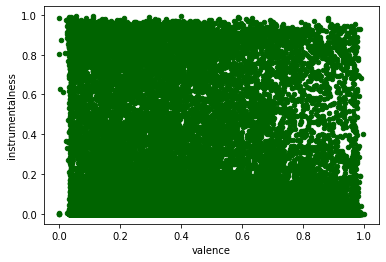

In [44]:
ax1 = data.plot.scatter(x='valence', y='instrumentalness', c='DarkGreen')

Erzeuge einen Scatterplot mit den Variablen 'energy' and 'loudness'
<!---ax2 = data.plot.scatter(x='energy', y='loudness', c='DarkBlue')--->

Besteht ein Zusammenhang zwischen den Variablen?
<!---(Zwischen "energy" und "loudness" scheint ein Zusammenhang zu bestehen.)--->
<!---grr = pd.plotting.scatter_matrix( data.iloc[:,5:18]
                                 ,figsize=(15, 15)
                                 ,marker = 'o'
                                 ,hist_kwds={'bins' : 20}
                                 ,s = 60
                                 ,alpha = 0.8)
plt.show()--->

<h2>Vorverarbeitung</h2>

Auswahl von geeigneten Spalten (Integer, Float), siehe Zelle 4 Datentypen
<!---tab = data.iloc[:,5:18]--->

In [46]:
tab = data.iloc[:,   ]

Wie stark hängen die einzelnen Faktoren voneinader ab?
Als Maß für einen linearen Zusammenhang können wir den Pearson-Korrelationskoeffizient $R$ verwenden. Die Daten müssen hierfür mindestens intervallskaliert oder dichotom sein.
Intervallskaliert heißt, dass numerische, aufeinanderfolgende Werten immer den gleiche Abstand haben. Es muss kein echter Nullpunkt existieren. Ein Beispiel wäre die Temperaturskala Celsius. Sie hat keinen echten Nullpunkt, da 10° nicht doppelt so warm wie 5° sind. Dichotome Merkmale haben nur 2 Ausprägungen.
Überprüfe bei den Daten, ob die Voraussetzungen erfüllt sind!
<!---(to do für mich auch)--->

Der Pearson-Korrelationskoeffizient kann wie folgt berechnet werden:
$R = Corr(X,Y) = \frac{Cov(X,Y)}{\sqrt{Var(X)}\cdot \sqrt{Var(Y)}}$
wobei $Var(X) = \frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})²$ die empirische Varianz und $Cov(X,Y) = \frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})$ die Kovarianz ist. Der Korrelationskoeffizient $Corr(X,Y)$ kann also als normierte Kovarianz aufgefasst werden.
Wenn der Wert 1 beträgt, besteht ein vollständig positver, linearer Zusammenhang, bei -1 ein vollständig negativer und bei 0 gar kein Zusammenhang.
Mit Hilfe der Korrelationsmatrix können die Zusammenhänge dargestellt und visualisiert werden. Die Matrix ist symmetrisch.

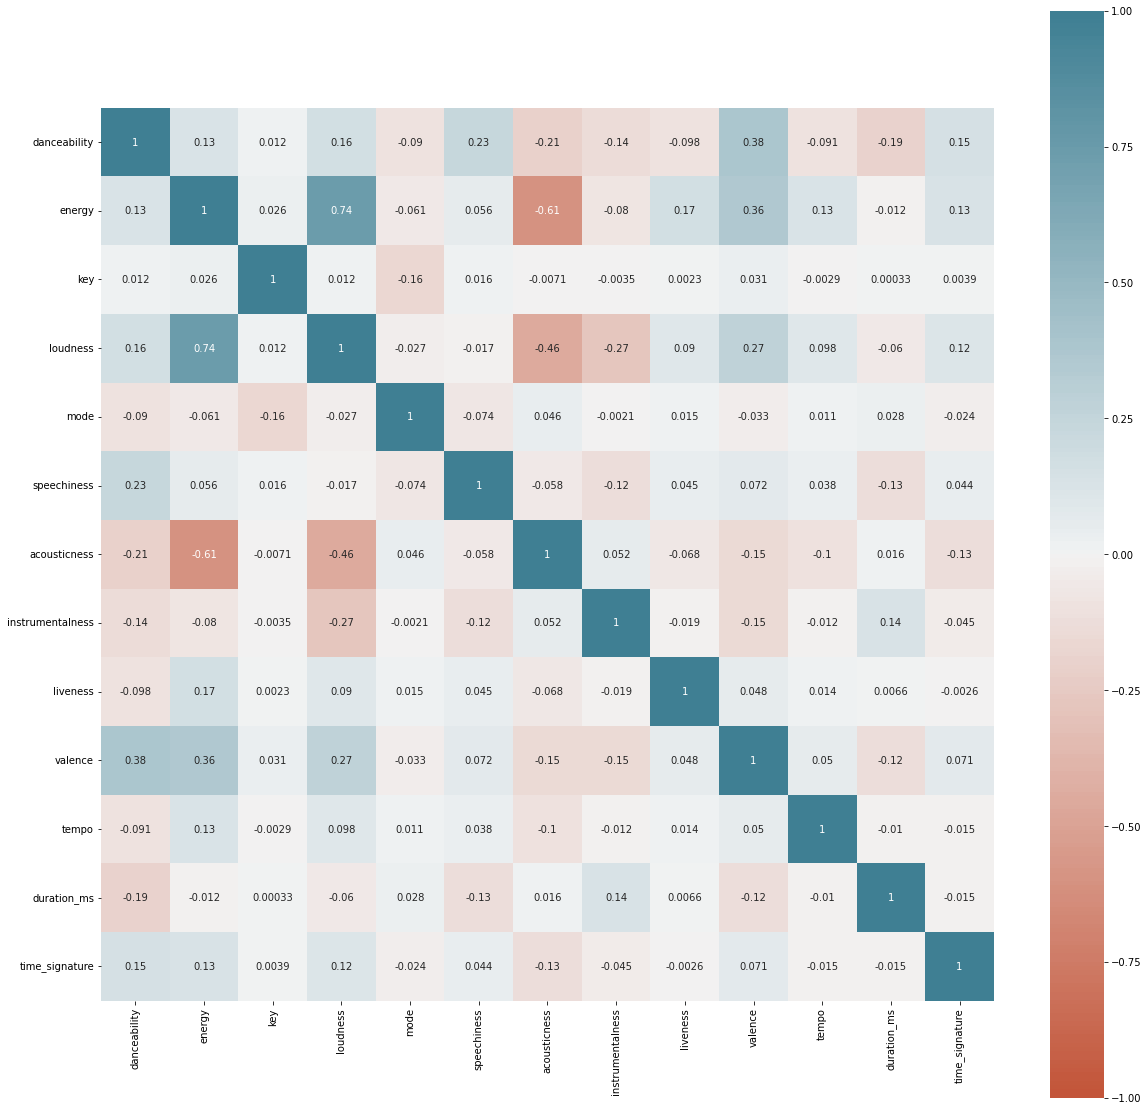

In [47]:
#plot correlation matrix
fig, ax = plt.subplots(figsize=(20, 20))
ax = sn.heatmap(tab.corr(), vmin=-1, vmax=1, center=0,
cmap=sn.diverging_palette(20, 220, n=200), square=True, annot=True)
#plt.savefig('Korrelationmatrix')
plt.show()

<h2> Festlegen des Zielprameters: 'Energy'</h2>

Als nächstes wollen wir die Werte für den Faktor 'Energy' mit Hilfe der anderen Variablen vorhersagen. 

In [48]:
target = tab['energy']

<h3>Multikollinearität</h3>

Bei starker Korrelation zwischen den Vorhersagevraiablen ist keine Regression möglich, da nicht mehr
zugeordnet werden kann, welche Variable was vorhersagt.

Das multiple Bestimmtheitsmaß $R²$ gibt an wie groß der Anteil, der durch die Variablen erklärte Varianz, an der Gesamtvarianz ist. Es kann nur Werte zwischen 0 und 1 annehmen. Es ist das Quadrat des Pearson-Korrelationskoeffizienten $R$.

Maß für Multikollinearität: Varianzinflationsfaktor (VIF) $= \frac{1}{1-R²}$

Faustregel: Nutze nur Variablen mit VIF < 10.

In [49]:
X = tab.drop(['energy'], axis = 1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

             feature        VIF
0       danceability  23.760892
1                key   3.227903
2           loudness   8.563213
3               mode   2.345850
4        speechiness   2.193602
5       acousticness   2.692953
6   instrumentalness   1.208962
7           liveness   2.603739
8            valence   7.098765
9              tempo  17.193253
10       duration_ms   8.585821
11    time_signature  53.575961


Entfernen von Variablen mit VIF>10

In [13]:
X = X.drop(['danceability','tempo', 'time_signature'], axis = 1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)


            feature       VIF
0               key  2.993212
1          loudness  7.072246
2              mode  2.221294
3       speechiness  2.019460
4      acousticness  2.652936
5  instrumentalness  1.201029
6          liveness  2.455128
7           valence  4.355255
8       duration_ms  6.208444


<h3>Skalierung der Daten</h3>

Es gibt verschiedene Varianten Daten zu skalieren, die beiden beliebtesten sind Normalisierung und Standartisierung. Wir beschränken uns hier auf die Normalisierung.

Die Variablen unseres Datensatzes haben unterschiedliche Minimum- und Maximumwerte (siehe Zelle 7 data.describe()). Das macht es schwer sie zu vergleichen. Viele Algorithmen können damit nicht oder nur schwer umgehen oder benötigen längere Trainingszeiten bei unskalierten Daten.

Mittels Normalisierung transformieren wir die Variablenwerte in das gleiche Intervall $[0,1]$. Dafür können wir die Funktion `MinMaxScaler` von `sklean.preprocessing` nutzen.



In [50]:
min_max_scaler = spp.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(X)

<h3>Aufteilung in Trainings- und Testdaten</h3>

Die Daten werden nun aufgeteilt in Trainings- und Testdaten. Während dem Trainingsprozess sieht das Modell nur Daten aus dem Trainingssatz. Im Anschluss kann dann mit den Testdaten überprüft werden, wie das Modell mit ungesehenen Daten umgeht. Dadurch kann man beurteilen, ob das Modell gut generalisiert oder overfitted.

In [52]:
#split data
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, test_size=0.3, random_state=42)


<h2>Lineare Regression</h2>

Lineare Regression ist ein statistisches Modell zur Vorhersage einer abhängigen Variablen mittels einer oder mehrerer unabhängigen Variablen. Es wird angenommen, dass eine lineare Abhängigkeit zwischen den unabhängigen Variablen und der abhängigen Variable besteht. Die abhängige Variable kann also als gewichtete Summe der Elemente der unabhängigen Variablen dargestellt werden.
Als Score dient wieder das multiple Bestimmtheitsmaß $R²$, nur dass es hier für den Zielparameter berechnet wird.


In [53]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print('Trainingsscore: ', linreg.score(X_train, y_train))
print('Testscore: ', linreg.score(X_test, y_test))

# score, R2 erklären

Trainingsscore:  0.691212314463032
Testscore:  0.6919132170633322


<h3>Feature Importance</h3>

Welche Variablen sind für die Vorhersage wichtig und welche eher nicht? Dazu können wir uns die Koeffizienten der Variablen
in der Regressionsgleichung ausgeben lassen.

In [54]:
def plotFeatureImportance(importances, title, ylab, keys):
    feat_importances = pd.Series(importances, index=keys)
    fig, ax = plt.subplots(figsize=(10, 10))
    feat_importances.plot.bar(ax=ax)
    ax.set_title(title)
    ax.set_ylabel(ylab)
    fig.tight_layout()
    # plt.savefig(title)
    plt.show()

Trainingsscore:  0.691212314463032
Testscore:  0.6919132170633322


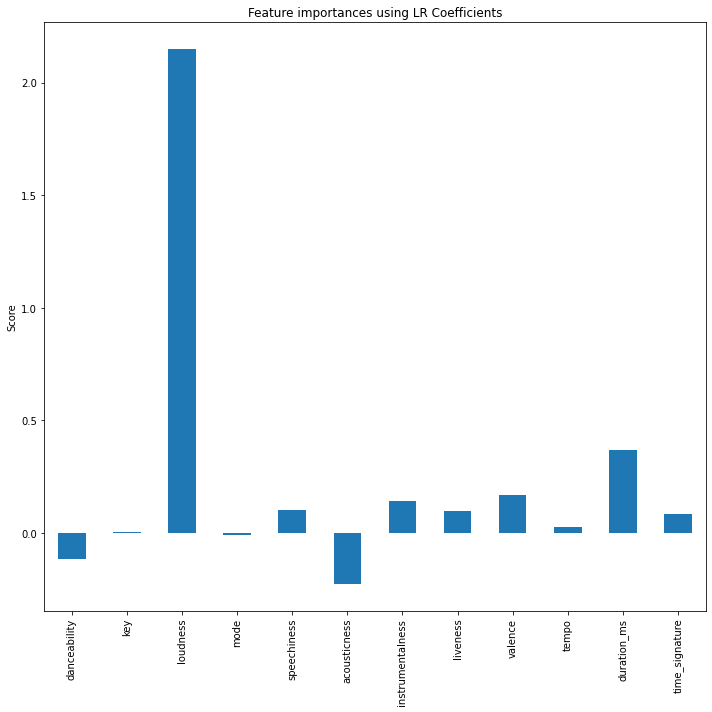

In [55]:
print('Trainingsscore: ', linreg.score(X_train, y_train))
print('Testscore: ', linreg.score(X_test, y_test))

plotFeatureImportance(linreg.coef_, "Feature importances using LR Coefficients", "Score", X.keys())

<h3>Lineare Regression mit ausgewählten Parametern</h3>

Anhand der Feature Importance können wir jetzt die vielversprechendsten Variablen auswählen und uns anschauen, wie gut die Vorhersage
mit nur diesen funktioniert.

Regression mit 3 Variablen:

In [56]:
tb = tab[['loudness','acousticness','duration_ms']]
min_max_scaler = spp.MinMaxScaler()
scaled_data3 = min_max_scaler.fit_transform(tb)

#split data
X_train, X_test, y_train, y_test = train_test_split(scaled_data3, target, test_size=0.3,
                                                                                random_state=42)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print('Trainingsscore: ', linreg.score(X_train, y_train))
print('Testscore: ', linreg.score(X_test, y_test))

Trainingsscore:  0.6339224897399558
Testscore:  0.6345198241471848


Lineare Regression mit einer Variable:

In [57]:
tb = tab[['loudness']]
min_max_scaler = spp.MinMaxScaler()
scaled_data3 = min_max_scaler.fit_transform(tb)

#split data
X_train, X_test, y_train, y_test = train_test_split(scaled_data3, target, test_size=0.3,
                                                                                random_state=42)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print('Trainingsscore: ', linreg.score(X_train, y_train))
print('Testscore: ', linreg.score(X_test, y_test))

Trainingsscore:  0.5423454323561552
Testscore:  0.5464689699323277


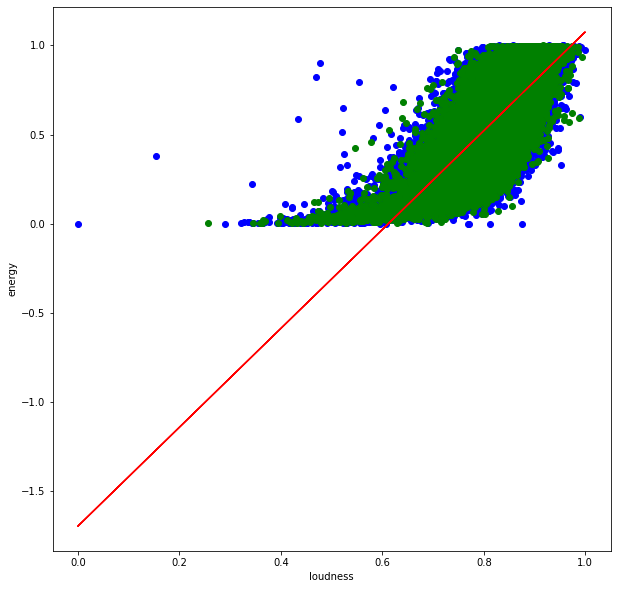

In [58]:
plt.figure(figsize=(10, 10))
plt.scatter(X_train, y_train, color = 'blue')                 # Blaue Punkte sind Trainingsdaten
plt.scatter(X_test, y_test, color = 'green')                  # Grüne Punkte sind Testdaten
plt.plot(X_train, linreg.predict(X_train), color = 'red')         # Hier ensteht die Gerade (x, y) = (x, lr.predict(x)
plt.xlabel('loudness')
plt.ylabel('energy')
plt.show()

# Führe eine Regression mit dem Zielparameter 'duration_ms' durch!

<h2>Regression mit Support Vector Machine</h2>

In [59]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, test_size=0.3,
                                                                                random_state=42)

linSVM = svm.SVR(kernel ='linear')
linSVM.fit(X_train, y_train)
y_pred = linSVM.predict(X_test)

print('Trainingsscore: ', linSVM.score(X_train, y_train))
print('Testscore: ', linSVM.score(X_test, y_test))

Trainingsscore:  0.6910805202078507
Testscore:  0.6918438729699541


In [60]:
rbfSVM = svm.SVR(kernel ='rbf')
rbfSVM.fit(X_train, y_train)
y_pred = rbfSVM.predict(X_test)

print('Trainingsscore: ', rbfSVM.score(X_train, y_train))
print('Testscore: ', rbfSVM.score(X_test, y_test))

Trainingsscore:  0.7529558528311175
Testscore:  0.7473690687019261


<h2> Regression mit Random Forest</h2>

In [62]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred =rfr.predict(X_test)

print('Trainingsscore: ', rfr.score(X_train, y_train))
print('Testscore: ', rfr.score(X_test, y_test))

Trainingsscore:  0.9690290990199655
Testscore:  0.7767262562288538


<h2> Songs mit der höchsten und niedrigsten vorhergesagten Energie </h2>

In [26]:
energy_max = y_test.keys()[np.argmax(y_pred)]
energy_min = y_test.keys()[np.argmin(y_pred)]
print(f"Lowest Energy: {data['name'][energy_min]} - https://open.spotify.com/track/{data['id'][energy_min]}")
print(f"Highest Energy: {data['name'][energy_max]} - https://open.spotify.com/track/{data['id'][energy_max]}")

Lowest Energy: Glassworks: Opening - https://open.spotify.com/track/2XYEu7Deyz20WeL6Py3XLc
Highest Energy: Slaves Beyond Death - https://open.spotify.com/track/50LghzgSucxBWYNSkvn5G0


# Maschinelles Lernen - Überblick:

Maschinelles Lernen ist ein Teilgebiet der künstlichen Intelligenz. Die Modelle "lernen" anhand der Daten Vorhersagen zu machen, ohne explizit dafür programmiert zu sein.
Es werden folgende Varianten unterschieden:
- Supervised Learning (Klassifikation)
- Semi-supervised Learning (Klassifikation)
- Unsupervised Learning  (Clustering)
- Reinforcement Learning (autonomes Fahren)

Wenn ihr mehr erfahren wollt, besucht weitere Trainings von uns.

To Do:
- Random Forest oder SVM?
- Quellen